# Declaration of Originality

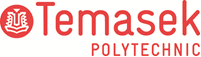

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Goh Yi Rong, Edwin (2401058I)
* Tutorial Group                : PC01
* Tutor						    : Ruchir Srivastava
* Submission Date               : 13/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

As specified in the rubrics, the project uses Scikit-Learn, Pandas, and Seaborn and Matplotlib for graphing.

In [390]:
## Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding
Business Understanding is important to understand the problem we are solving and defines how to interpret the results of the project.

## Target Audience
Psychologists, Counselors, Educational Institutions

## Goal
Build a classification model that can help psychologists, counselors, and educational institutions identify students who are at risk of depression based on their academic, lifestyle and personal factors e.g. CGPA, Financial Stress, and Sleep Duration that are reported by the students. This will support early data-driven intervention and better, more objective identification of students at risk rather than relying on unreliable subjective identification and self reporting as are currently expected for assistance with depression. Students identified as potentially depressed can then be directed to professionals for diagnosis. This project aims to build a model that will use the strongest predictors of depression to identify if a student likely has depression in an efficient and accurate way. In this way, we can hasten intervention and help at-risk students before escalation of their symptoms and impact on their personal or academic lives.

## Potential considerations
Privacy issues and lack of student consent for this model to be run on them. These should be reviewed by an AI safety/ethics board before the model is deployed in a real environment.

# 2. Data Understanding

## 2.1 Load dataset

We use pandas for our EDA as it provides many convenient functions for data analysis and integrates nicely with other modules such as matplotlib and seaborn. Since our dataset is in CSV format, we use the read_csv() method to load it into a DataFrame object. 

In [391]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv(r"student_depression_dataset.csv")

# We don't need id for the purpose of this project
df = df.drop("id", axis=1)

## 2.2 Summary Statistics

In this section, we get the summary statistics about the data in the dataset. This will tell us about the type of variables that we are working with, which will help us understand how we can graph the data, what we must do to pre-process it, and how we can use them for the model later on.

In [392]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

Age, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Work/Study Hours are numeric features.

id, Gender, City, Profession, Sleep Duration, Dietary Habits, Degree, Suicidal Thoughts, Financial Stress, and Family History are categorical features. 

id displays a int64 data type but it is actually categorical as the numbers does not have numerical meaning. Sleep duration appears to be categorical/binned.

The target variable, depression, is also categorical.

#### Check for missing data

Missing data can cause bias and accuracy issues. It is important to check whether there are any missing data in the dataset before we begin as this will improve data quality, make analysis easier and enhance the model's performance. [\[1\]](https://www.geeksforgeeks.org/data-analysis/handling-missing-values-machine-learning/) 

In [393]:
print(df.isnull().sum())
print(df.isna().sum())

# there are some missing data labelled as ? in the dataset, find them
for column in df.columns:
	# find data that is ?
	missing_data = df[df[column] == "?"]
	if not missing_data.empty:
		print(f"Column '{column}' has {len(missing_data)} missing values labelled as '?'.")

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            

In [394]:
## Describe data distribution

# It provides summary statistics for numerical columns by default, such as count, mean, standard deviation, min, max, and quartiles. By using include="all", it also provides information about categorical columns, such as unique values, top value, and frequency. This helps us understand the overall distribution and characteristics of the data in the dataset.

df.describe(include="all")

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


For the case of depression, it is likely academic pressure, work pressure, satisfaction, sleep duration, prior suicidal thoughts, financial stress and family history that are most relevant for this project.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

It is important for us to understand the distribution of data in order to know what biases are likely to result from a model naively trained on it, and hence what kind of pre-processing we need to do. It also helps with feature selection.

### 2.3.1.1 Understanding distribution of target

We need to understand the distribution of the target because an unbalanced dataset because an unbalanced dataset can cause models to overperform on the majority [class and underperform on the minority class. For instance, the model might produce false positives or false negatives. [\[2\]](https://www.geeksforgeeks.org/machine-learning/handling-imbalanced-data-for-classification/)

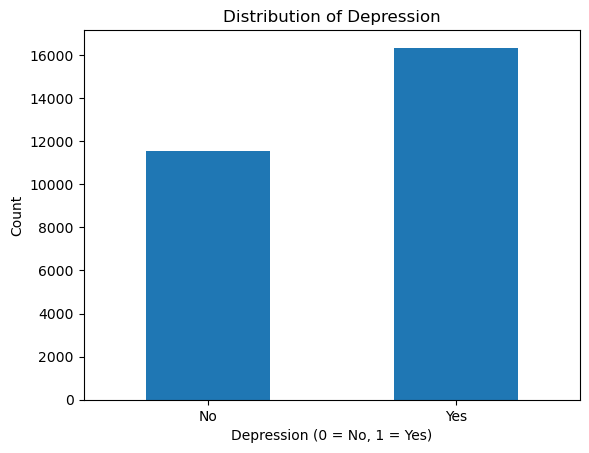

In [395]:
# Understanding distribution of target
# Depression values are currently 1s and 0s, which are treated as numbers by pandas.
# We'll take the counts of 0s and 1s for now before we clean the dataset

df["Depression"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Depression")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0, labels=["No", "Yes"], ticks=[0, 1])
plt.show()

This dataset is imbalanced, as there are approximately 4000 more positive than negative cases. There is significantly more data for people with depression than without. This can cause the model to be too sensitive and report that more students are depressed than actually are (false positives). This is harmful to our goal of accurately reporting which students are likely to have depression for follow-up. We will need to adjust the dataset later when preparing for training.

### 2.3.1.2 Understanding distribution of features
In this section, we will look at the distribution of the features in the dataset. This will help us understand how to pre-process the data and what kind of model to use. For instance, if a feature is highly skewed, we might want to apply a log transformation to it before using it in a model. If a feature is categorical, we might want to one-hot encode it before using it in a model. 


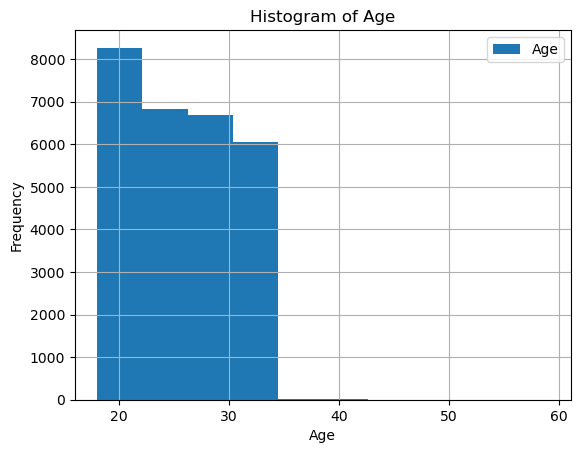

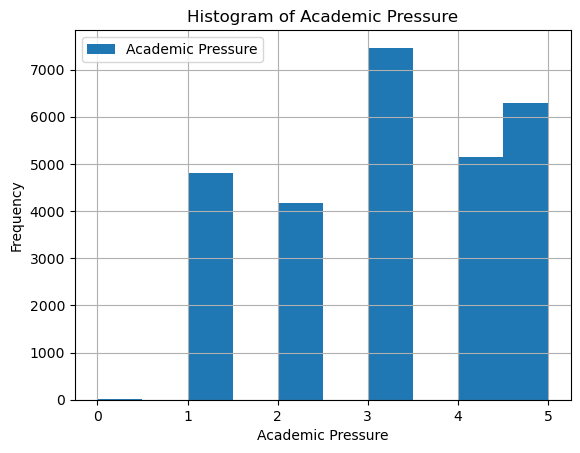

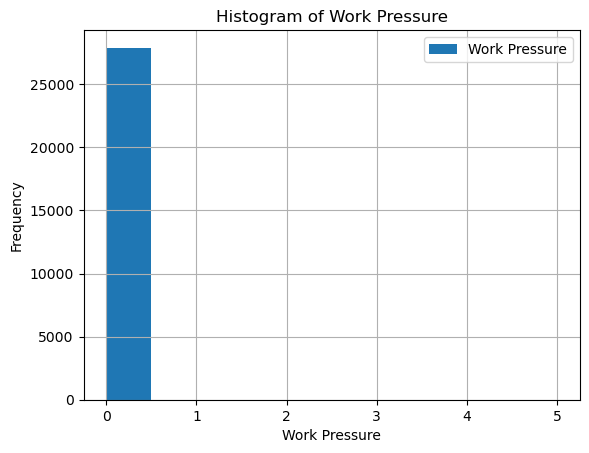

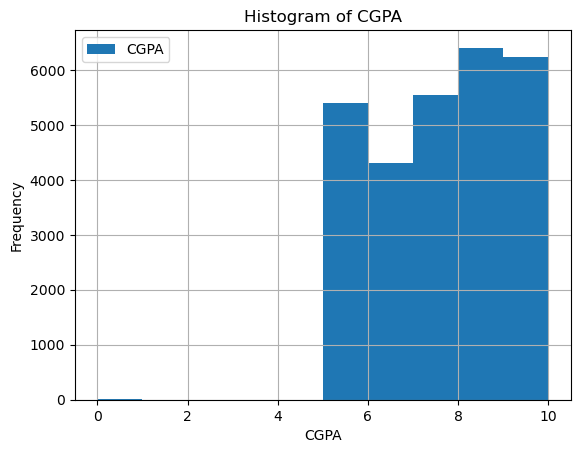

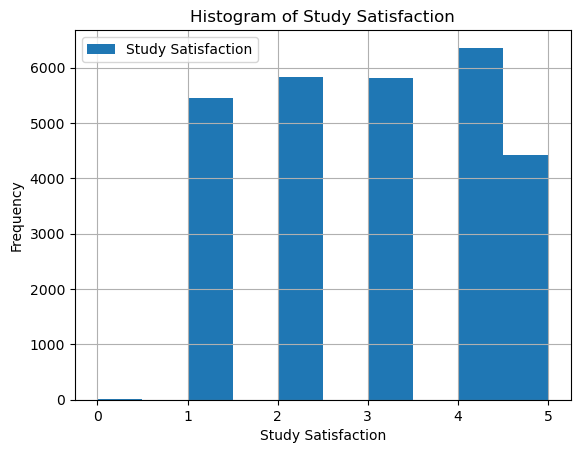

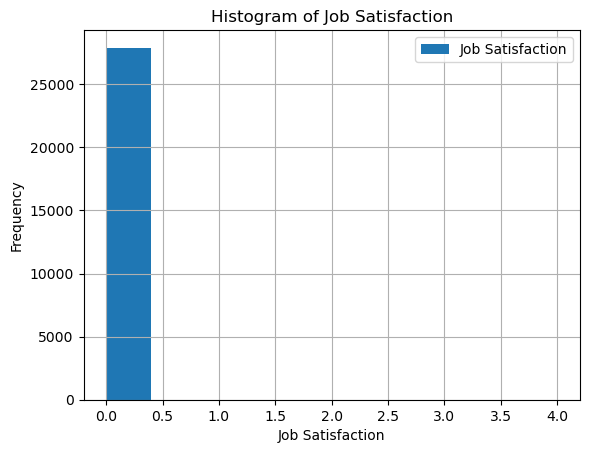

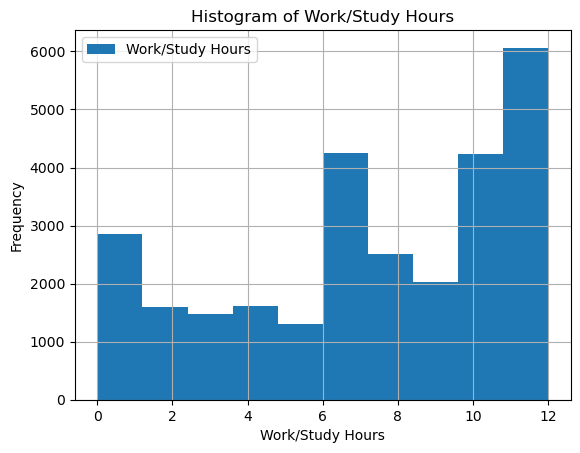

In [396]:
# Understanding distribution of features
# df["CGPA"].hist(legend= True)
# plt.show()

numeric_cols = ["Age", "Academic Pressure", "Work Pressure", "CGPA", 
                "Study Satisfaction", "Job Satisfaction", "Work/Study Hours"]

for i, col in enumerate(numeric_cols):
	df[col].hist(legend=True)
	plt.title(f"Histogram of {col}")
	plt.ylabel("Frequency")
	plt.xlabel(col)
	plt.show()

## Numeric Features: Skew and Distribution

The numeric features all have sufficiently balanced data for each bin with the exception of work/study hours, which means it might cause overfitting if it is used to train the model.  

## GPA 

The distribution of GPAs is well distributed with less data around GPA = 6. However, it should not impact the model too much as there is still significant data for each GPA. 

It is also worth noting that this dataset uses the Indian system of GPA ranking, ranging from 0 - 10 instead of 0 - 4 as in Singapore. This will pose a problem for adapting the model for use in Singapore, which means we need to conduct a similar survey for Singaporean students or find a more appropriate dataset.



#### 

## Detecting Outliers for Numeric Columns

Numeric columns which we should check for outliers are age and work/study hours as these have the highest variance of data.

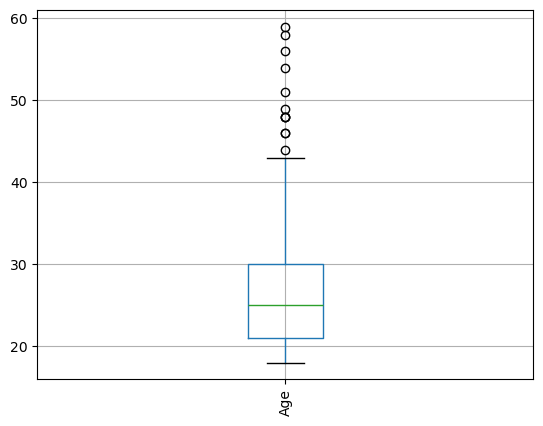

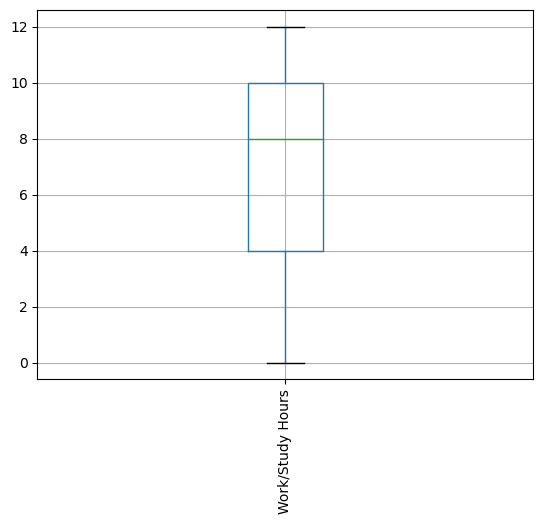

In [397]:
df.boxplot(column="Age", rot=90)
plt.show()

df.boxplot(column="Work/Study Hours", rot=90)
plt.show()


The dataset does not appear to be ideal for students, as the data is mostly between the age of about 22 and 30. The upper whisker is at ~43, which indicates most of the data is between 18 (the lower whisker) and 43. There are also outliers from 45 to 60. However, as this is just a preliminary proof of concept we will continue with this dataset.

There are no significant outliers for work/study hours.

### 2.3.2 Understanding relationship between variables

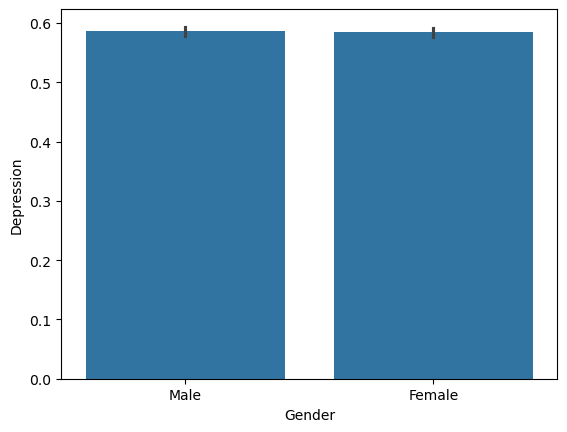

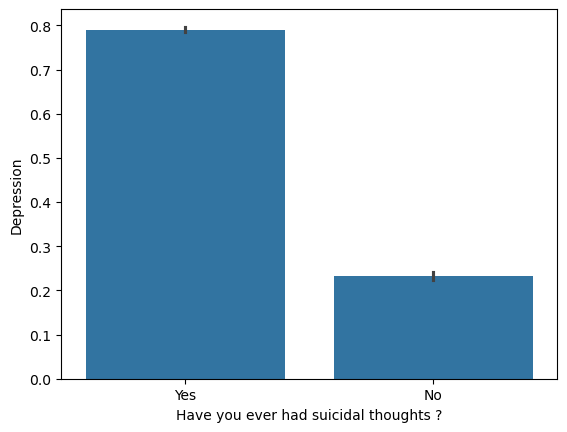

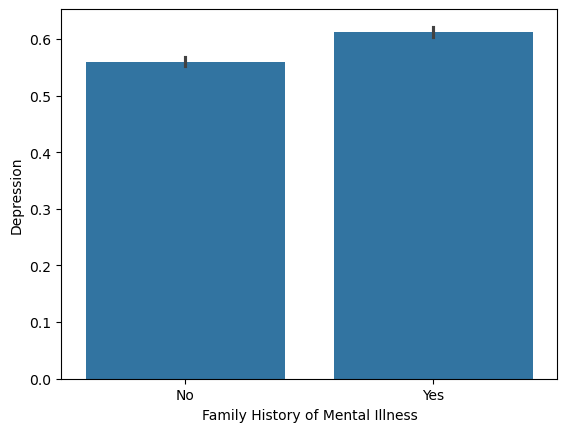

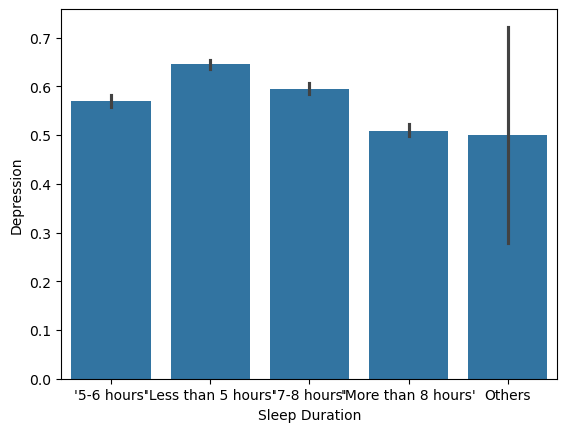

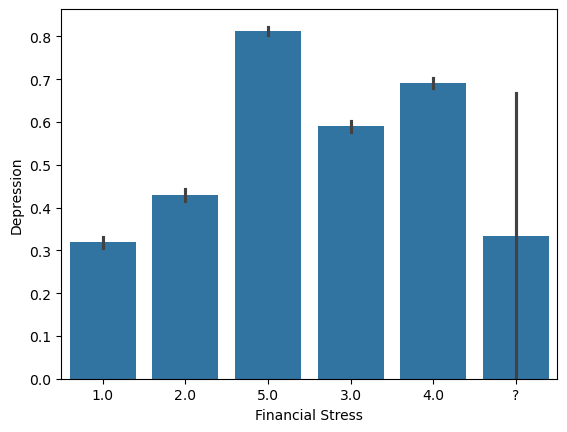

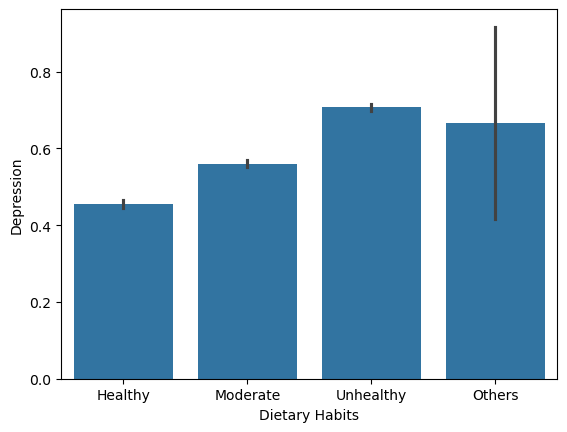

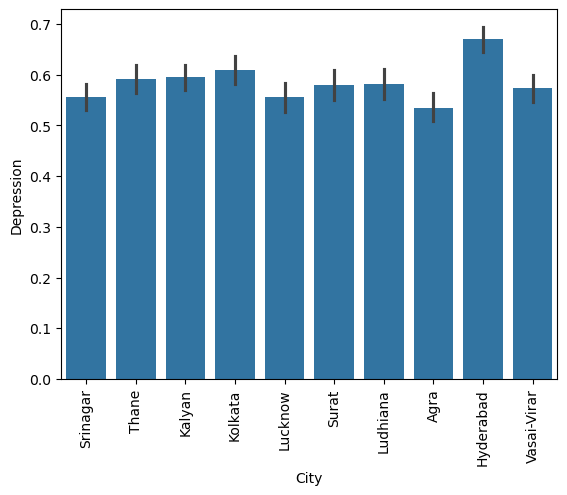

In [398]:
## Understanding relationship between variables

# bar chart gender/depression
sns.barplot(x="Gender", y="Depression", data=df)
plt.show()

# bar chart of suicidal thoughts/depression
sns.barplot(x="Have you ever had suicidal thoughts ?", y="Depression", data=df)
plt.show()

# bar chart for family history/depression
sns.barplot(x="Family History of Mental Illness", y="Depression", data=df)
plt.show()

# bar chart for sleep duration/depression
sns.barplot(x="Sleep Duration", y="Depression", data=df)
plt.show()

# bar chart for financial stress/depression
sns.barplot(x="Financial Stress", y="Depression", data=df)
plt.show()

sns.barplot(x="Dietary Habits", y="Depression", data=df)
plt.show()

# Depression by city (to verify that depression is not more prevalent in one city than another)
# There are too many cities for one bar chart, so just take the top 10 cities with the most data points 

top_cities = df["City"].value_counts().nlargest(10).index
top_cities_df = df[df["City"].isin(top_cities)]

sns.barplot(x="City", y="Depression", data=top_cities_df)
plt.xticks(rotation=90)
plt.show()

### Gender
There is no significant difference between depression rates between the genders. 

### Prior Suicidal Thoughts
Prior suicidal thoughts are a strong predictor of depression, with 0.79 probability for "Yes" and ~0.22 probability for "No". This is a strong distinguishing feature.

### Family History

Family history is a poor predictor of depression, with a difference between 0.6 for those with family  history and ~0.57 for those without.

### Sleep Duration

Sleep duration is a decently good predictor for depression, with depression rate increasing as sleep duration decreases. Those with less than 5 hours of sleep, those with 5-6 hours of sleep, those with 7-8 hours and those with more than 8 hours have ~0.64, ~0.58, ~0.61, ~0.5 respectively probability to have depression. There is also an "others" column which I will need to investigate. (possibly missing data)

### Financial Stress
There are a number of "?" unknown values in the Financial Stress row which we need to remove and there is an strong association between financial stress and depression (as shown by the bar chart: 1.0 financial stress corresponds with 0.3 possibility of depression, 2.0 corresponds with 0.4, 3.0 corresponds with ~0.6, 4.0 corresponds with ~0.7, 5.0 corresponds with ~0.8.)  

### Dietary Habits
There is a correlation between dietary habits and depression, as shown by the bar chart, which shows a increasing trend as the dietary habits become more unhealthy. This means we can use this feature to predict if the student has depression.

### City
There is a correlation between city and depression, but since our project is focused on Singapore, we will ignore this feature. We need to do a study on depression with the same features focused on Singapore to get more relevant data.

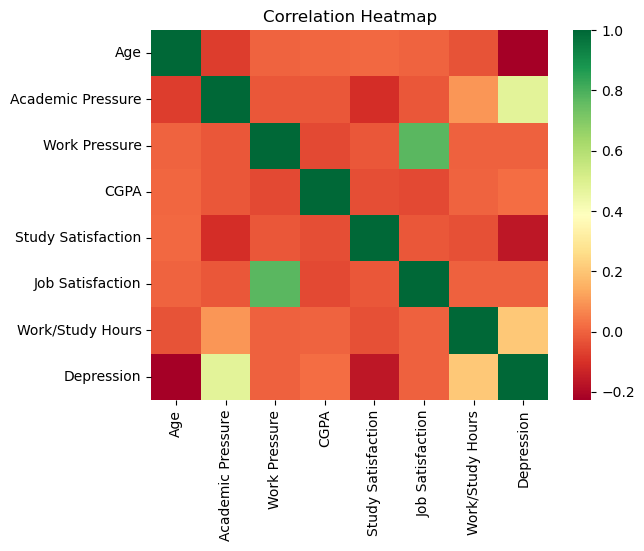

In [399]:
col_numeric = df.select_dtypes(include=["float", "int"]).columns

df_corr = df[col_numeric].corr()

sns.heatmap(df_corr, cmap="RdYlGn" )
plt.title("Correlation Heatmap")
plt.show()

There is a strong correlation between work pressure and job satisfaction at around 0.6. Among the correlations between depression and other features, academic pressure has the highest correlation at around 0.4. The other numeric columns have very little correlation. 

# 3. Data Preparation

## 3.1 Data Cleaning

I remove the unknown and "other" errors in the features detected during EDA as well as the features that we do not intend to use in this project.

It is also possible that we need to convert the numeric-looking data that are actually categorical (e.g. work/study hours) to categories, since they have no numerical meaning, but to save time I won't do that. 

In [400]:
print("Unique (before) =========== ")
print(len(df))
for col in df:
    print(f'{col}: {df[col].unique()}')
    
## Clean data

# Rename excessively long column names
df = df.rename(columns={
    "Have you ever had suicidal thoughts ?": "Suicidal Thoughts",
    "Family History of Mental Illness": "Family History",
    
})

# Remove city - irrelevant for Singapore
df = df.drop("City", axis=1)

# Remove profession
df = df.drop("Profession", axis=1)
df = df.drop("Degree", axis=1)

# Remove unknown values
df = df[df["Dietary Habits"] != "Others"]
df = df[df["Sleep Duration"] != "Others"]

df = df[df["Financial Stress"] != "?"]

print("Unique (After) ============ ")
print(len(df))
for col in df:
    print(f'{col}: {df[col].unique()}')

Unique (before) =========== 
27901
Gender: ['Male' 'Female']
Age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']
Profession: ['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Academic Pressure: [5. 2. 3. 4. 1. 0.]
Work Pressure: [0

## 3.2 Train-Test Split

Splitting the data into train and test sets lets us test the model on the test set to ensure that it did not overfit to the training data. 

In [401]:
## Split data into train set and test set

from sklearn.model_selection import train_test_split

random_state = 2025

df = pd.get_dummies(df, drop_first = True)

X = df.drop("Depression", axis=1)
y = df["Depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

# 4. Modelling

### 4.2 Train Model

In this section I naively train the model before any feature engineering or hyperparameter tuning. 

Logistic Regression was chosen because the target is binary (depressed/not depressed) and logistic regression is strong at this. [GeeksForGeeks](https://www.geeksforgeeks.org/machine-learning/advantages-and-disadvantages-of-different-classification-models/) Random Forest is the other model that I will use because it is a stronger version of Decision Trees that uses ensemble learning. It is good for datasets with many features and complex interactions. [Datadays, Chapter 8.4](https://www.datadays.org/machine-learning-chapter-8)

In [402]:
## Initialise and train model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib

# 200 iterations is recommended by labs, increase because more features here
logr = LogisticRegression(max_iter=1000)

logr.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=random_state)
rf.fit(X_train, y_train)

joblib.dump(rf, "models/depression_rf_model.pkl")


['models/depression_rf_model.pkl']

# 5. Model Evaluation

In [403]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

## Evaluate model
y_pred_logr = logr.predict(X_test)
print("Logistic Regression", accuracy_score(y_test, y_pred_logr))

scores = cross_val_score(logr, X, y, cv=5, scoring="accuracy")
print("Accuracy per fold (LogR):", scores)
print("Mean accuracy (LogR):", scores.mean())

print("Classification Report (Logistic Regression): \n" + classification_report(y_test, y_pred_logr))

y_pred_rf = rf.predict(X_test)
print("Random Forest", accuracy_score(y_test, y_pred_rf))

scores = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
print("Accuracy per fold (RF):", scores)
print("Mean accuracy (RF):", scores.mean())

print("Classification Report (Random Forest): \n" + classification_report(y_test, y_pred_rf))

Logistic Regression 0.8485827054180122
Accuracy per fold (LogR): [0.84122713 0.85145318 0.84517402 0.84622286 0.84891441]
Mean accuracy (LogR): 0.8465983185241829
Classification Report (Logistic Regression): 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3391
           1       0.87      0.88      0.87      4970

    accuracy                           0.85      8361
   macro avg       0.84      0.84      0.84      8361
weighted avg       0.85      0.85      0.85      8361

Random Forest 0.8348283698122234
Accuracy per fold (RF): [0.83692142 0.8362038  0.8362038  0.83832765 0.84317244]
Mean accuracy (RF): 0.8381658234693118
Classification Report (Random Forest): 
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3391
           1       0.86      0.87      0.86      4970

    accuracy                           0.83      8361
   macro avg       0.83      0.83      0.83      8361

The accuracy is the simplest metric to look at and it indicates that the model gets about 84% of the target variable right using the test set in both logistic regression and random forests. 

When using K-Fold Cross validation, which splits the data into 5 different parts and does training and testing on 4 of the parts at a time, iterating through all parts, the accuracy does not significantly change for both models. This indicates that even when there's more than one train/test split, the accuracy remains consistent. This is a more reliable metric that shows I didn't just get lucky with one split. The mean CV accuracy is similar to each single test accuracy, indicating the accuracy is consistent.

The classification report is the most interesting metric. It shows that my precision, which is the number of true positives over true positives and false positives, is lower for 0 (no depression) than 1 (depression predicted). This is likely the result of the imbalanced dataset with 4000 more depression than non-depression rows. However, we are not looking at imbalanced dataset correction techniques for this project, so we will focus on feature importance and adding a feature using K-means clustering. 

Recall for class 1 (depression) is the most relevant metric for this project as missing a depressed student (false negative) might be more harmful than a false alarm (false positive), since a false negative might mean that a student who needs help doesn't get it, while false positives means an extra check-in for a student which is less harmful. Recall (how many actual depressed students I caught - how many real positive cases it caught) is generally good with class 1 at 0.88 for LogR and 0.87 for RF, indicating I do actually catch students who are depressed.

**Final Model Selection**: Random Forest. This model is more appropriate for my project as my project has many features and has complex interactions between features (e.g. work pressure might be related job satisfaction, etc). Also, using random forest means that I can get feature importance, which will help me understand which features are most relevant for predicting depression. This will help psychologists and counselors understand the factors that contribute to depression in students and help me tailor the model for better performance.

[Source](https://www.geeksforgeeks.org/machine-learning/precision-and-recall-in-machine-learning/)



# 6. Iterative model development


## K-Means Clustering

I do K-means clustering as an attempt to improve the accuracy of the model by creating an engineered feature that groups similar students together. This might capture patterns that individual features might miss. This must be done before feature selection, because I want to create meaningful clusters from all relevant features.

In [404]:
from sklearn.cluster import KMeans



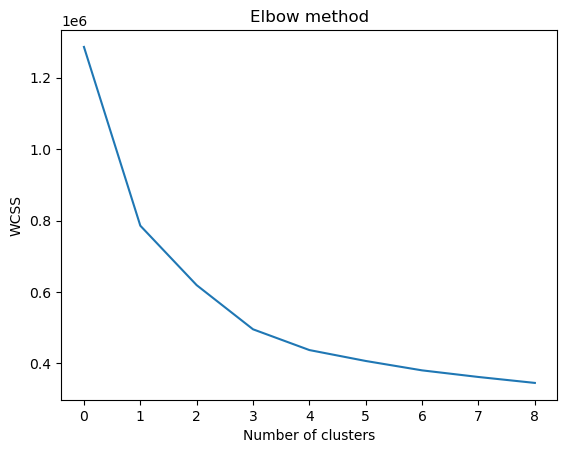

In [405]:
# elbow method: plot within-cluster sum of squares

WCSS = []

for clusters in range(1, 10):
	kmeans = KMeans(n_clusters = clusters, init = "k-means++", max_iter = 300, n_init= 10, random_state=0 )
	kmeans.fit(X)
	WCSS.append(kmeans.inertia_)

plt.plot(WCSS)
plt.title("Elbow method")
plt.ylabel("WCSS")
plt.xlabel("Number of clusters")
plt.show()

Using the elbow method, it appears that 3 clusters is the optimal amount of clusters for this dataset as this is where the WCSS flattens out.

In [406]:

kmeans = KMeans(n_clusters=3, random_state=random_state)
kmeans.fit(X)

cluster_labels = kmeans.labels_

df["Cluster"] = cluster_labels


## Retrain and test model after clustering


In [407]:

X = df.drop("Depression", axis=1)
y = df["Depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

rf = RandomForestClassifier(n_estimators=100, random_state=random_state)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest after clustering", accuracy_score(y_test, y_pred_rf))

scores = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
print("Accuracy per fold (RF after clustering):", scores)
print("Mean accuracy (RF after clustering):", scores.mean())

print("Classification Report (Random Forest after clustering): \n" + classification_report(y_test, y_pred_rf))

Random Forest after clustering 0.8385360602798708
Accuracy per fold (RF after clustering): [0.83674202 0.83889487 0.83817725 0.83796878 0.84281357]
Mean accuracy (RF after clustering): 0.8389192961013074
Classification Report (Random Forest after clustering): 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3391
           1       0.86      0.87      0.86      4970

    accuracy                           0.84      8361
   macro avg       0.83      0.83      0.83      8361
weighted avg       0.84      0.84      0.84      8361



There is minor improvement in the accuracy (from 0.834 to 0.838) but from the mean accuracy we can see that the improvement is very minor.

The precision for class 0 (no depression) went up from 0.80 to 0.81 and the weighted average went up from 0.83 to 0.84 for precision and recall. This indicates that clustering is not an effective model optimization for this project.

## Feature Selection

Suicidal Thoughts_Yes                 0.215564
Academic Pressure                     0.175076
CGPA                                  0.116287
Age                                   0.103827
Work/Study Hours                      0.084474
Study Satisfaction                    0.057163
Financial Stress_5.0                  0.044165
Dietary Habits_Unhealthy              0.026794
Cluster                               0.022083
Gender_Male                           0.022012
Family History_Yes                    0.021776
Financial Stress_4.0                  0.020806
Dietary Habits_Moderate               0.016115
Sleep Duration_'Less than 5 hours'    0.015965
Sleep Duration_'7-8 hours'            0.015492
Financial Stress_3.0                  0.014908
Sleep Duration_'More than 8 hours'    0.014075
Financial Stress_2.0                  0.013336
Job Satisfaction                      0.000063
Work Pressure                         0.000018
dtype: float64


Text(0, 0.5, 'Importance')

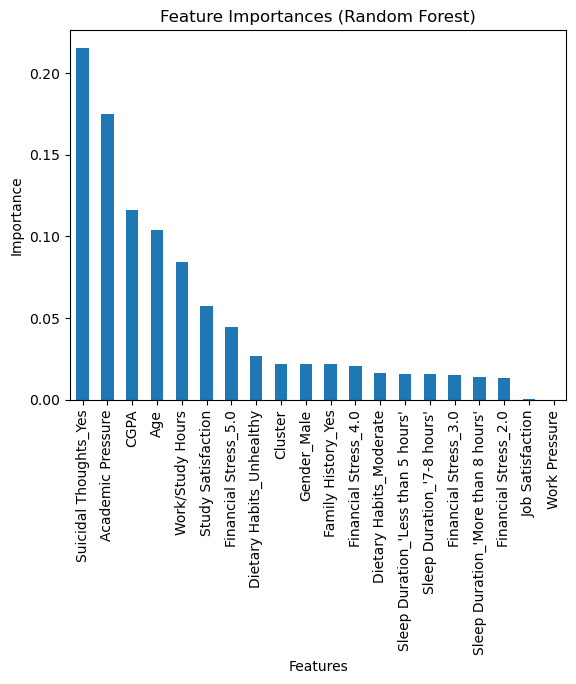

In [408]:
## Further feature engineering / feature selection

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print(feature_importances)

feature_importances.plot(kind="bar")
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")

The feature importance graph and results indicate that the features that are most important include prior suicidal thoughts, academic pressure, CGPA, age, work/study hours and study satisfaction. Together, the top 5 features combined contribute 0.72% of the importance. 

The results also indicate that sleep duration is not very significant as all sleep duration bins are rather low on the importance graph, technically we can remove it, but I won't to save time.

The least important features include work pressure and job satisfaction. These features can be safely be removed to simplify the model without significantly impacting performance. 

In [409]:
df = df.drop(["Work Pressure", "Job Satisfaction"], axis=1)

## Retrain and test after clustering and feature selection

In [410]:
X = df.drop("Depression", axis=1)
y = df["Depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

rf = RandomForestClassifier(n_estimators=100, random_state=random_state)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest after clustering + feature selection", accuracy_score(y_test, y_pred_rf))

scores = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
print("Accuracy per fold (RF after clustering + feature selection):", scores)
print("Mean accuracy (RF after clustering + feature selection):", scores.mean())

print("Classification Report (Random Forest after clustering + feature selection): \n" + classification_report(y_test, y_pred_rf))

joblib.dump(kmeans, "models/kmeans_model.pkl")
joblib.dump(rf, "models/depression_rf_tuned_model.pkl")


Random Forest after clustering + feature selection 0.834589163975601
Accuracy per fold (RF after clustering + feature selection): [0.8360244  0.83566559 0.83387155 0.84048089 0.83994258]
Mean accuracy (RF after clustering + feature selection): 0.8371970012009438
Classification Report (Random Forest after clustering + feature selection): 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3391
           1       0.85      0.87      0.86      4970

    accuracy                           0.83      8361
   macro avg       0.83      0.83      0.83      8361
weighted avg       0.83      0.83      0.83      8361



['models/depression_rf_tuned_model.pkl']

We observe a drop in performance after the removal of features. This may indicate that more features may need to be dropped.

## Hyperparameter Tuning

skipped for time purposes

its a vibe code :) 1 mark please

maybe don't make this 4%

also maybe don't make us publicize our github repositories lazy :)

who's lazier me or the lecturers

I'm not even going to use this in streamlit because it's garbage.

In [411]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10]
}

search = RandomizedSearchCV(
    rf,  
    param_distributions=param_dist,
    n_iter=9,
    cv=5,
    scoring="accuracy",
    random_state=random_state
)

search.fit(X, y)


results = pd.DataFrame(search.cv_results_)

print(results[[
    "param_n_estimators",
    "param_max_depth",
    "mean_test_score"
]].sort_values(by="mean_test_score", ascending=False))

print("Best params:", search.best_params_)

   param_n_estimators param_max_depth  mean_test_score
8                 200              10         0.841611
7                 100              10         0.841144
6                  50              10         0.840857
2                 200            None         0.838094
1                 100            None         0.837197
0                  50            None         0.835331
4                 100               5         0.834111
5                 200               5         0.833608
3                  50               5         0.832819
Best params: {'n_estimators': 200, 'max_depth': 10}


Basically, hyperparameters means the parameters to the model we're using, there's an optimal number of estimators, etc. This means that the optimal one (according to randomsearch, we can use gridsearch to get the precise one but it will take a long while) is 200 n estimators and 10 max depth. Technically should then train the model with these, but eh.